<a href="https://colab.research.google.com/github/zayo1511/LaboratorioDeAnalisisDeDatosFinancierosYDeDisenoDeIndicadores/blob/main/kmeans_orden_y_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Laboratorio de analisis de datos financieros y de diseño de indicadores/Analisis estadistico avanzado para KPIs/'
from sklearn import set_config
set_config(working_memory=1024)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
data = pd.read_csv(data_path + 'tlacuachitos_vip_customers_data.csv')
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [20]:
df_transactions = pd.read_csv(data_path + 'tlacuachitos_vip_transactions.csv')
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [21]:
# Separar variables numéricas y categóricas
numerical_features = ['Age', 'Income', 'Tenure']
categorical_features = ['Education', 'Industry', 'Geographic Location']

# Hacer las categóricas dummies
encoded_features = pd.get_dummies(data[categorical_features],
               columns=categorical_features,
               drop_first=True)

# Estandarizar variables numéricas
data_to_model_standarized = StandardScaler().fit_transform(data[numerical_features])

# Hacer dataframe variables numéricas
data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

# Acomodar variables categóricas
encoded_features_df = encoded_features.reset_index()

# Juntar ambas variables
data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
data_to_model = data_to_model.drop('index', axis=1)

In [22]:
# Dar más peso a ciertas variables para la agrupación
#data_to_model['Income'] = data_to_model['Income'] * 1.2
data_to_model

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,0.824019,0.121621,-0.878889,False,True,False,False,False,False,True,False,True,False,False
1,1.688471,0.286515,0.451668,False,False,False,False,False,False,True,False,False,False,True
2,0.159056,0.460267,-0.878889,False,False,False,False,True,False,False,False,True,False,False
3,-0.771892,0.620095,-0.878889,True,False,False,False,False,False,False,False,False,False,True
4,1.090004,0.444917,0.008149,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.170870,-0.365427,1.338705,False,False,False,False,False,False,False,False,True,False,False
1139,0.491537,-0.713290,1.782224,False,False,False,False,False,False,False,False,False,False,False
1140,-0.971381,0.399656,0.008149,True,False,False,False,True,False,False,False,False,True,False
1141,0.558034,-1.035115,0.451668,False,False,False,False,False,True,False,False,False,True,False


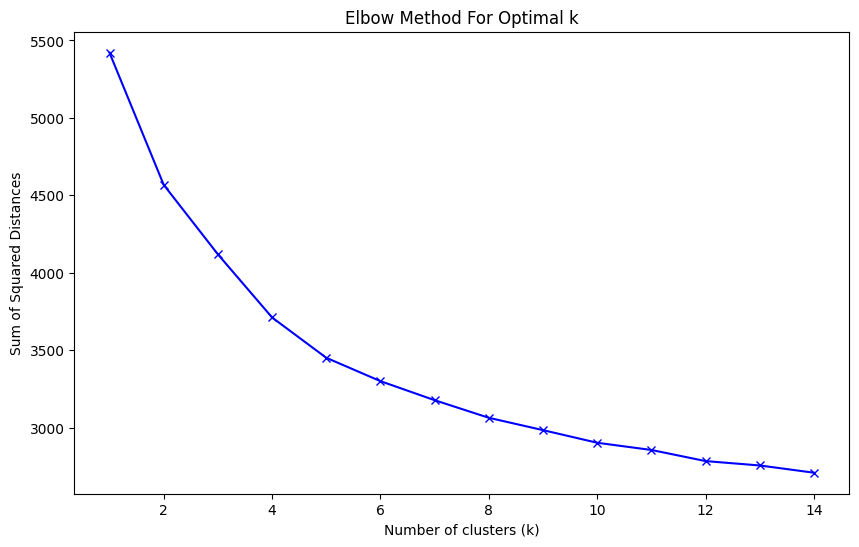

In [23]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 15)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_to_model)

# Agregar las etiquetas del cluster al DataFrame original para análisis
data_to_model['Cluster'] = labels
data['Cluster'] = labels
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [25]:
def boxplot_clusters(columns):
    for col in columns:
        plt.figure(figsize=(5, 5))
        sns.boxplot(x='Cluster', y=col, data=data, hue='Cluster', palette='Set3')
        plt.title(f'Boxplot de {col} por Clusters')
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

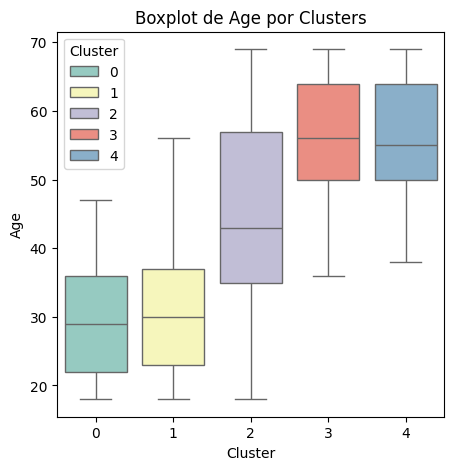

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

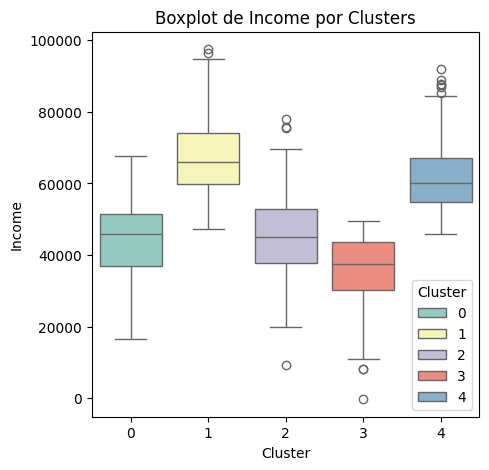

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

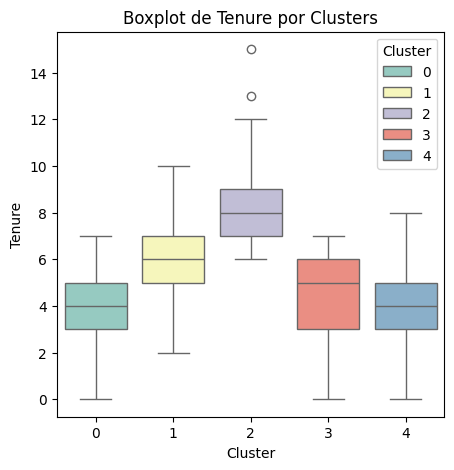

In [26]:
boxplot_clusters(numerical_features)

In [27]:
def barplot_clusters(columns):
    for col in columns:
        sns.countplot(x='Cluster', hue=col, data=data, palette='Set1')
        plt.title('Count of Entries by Cluster')
        plt.xlabel('Cluster')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

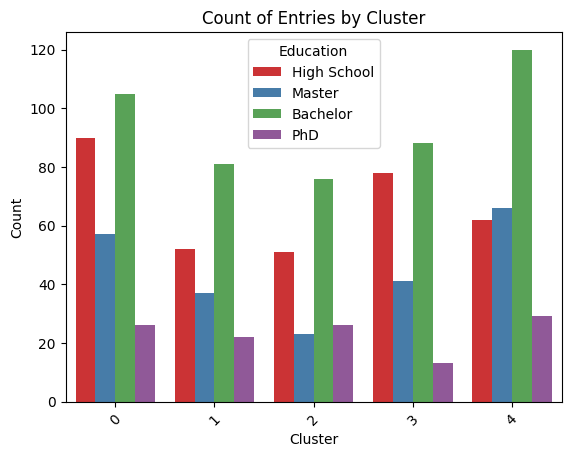

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

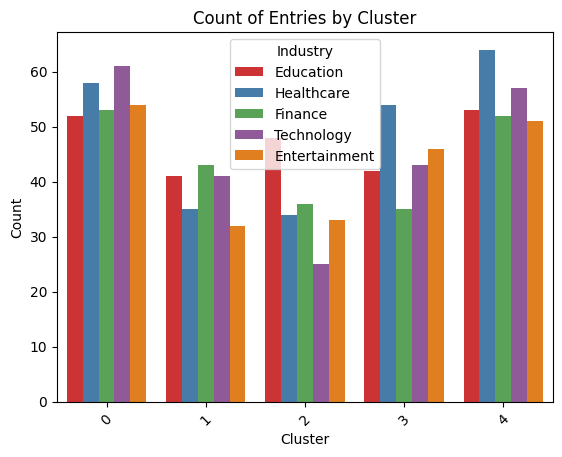

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

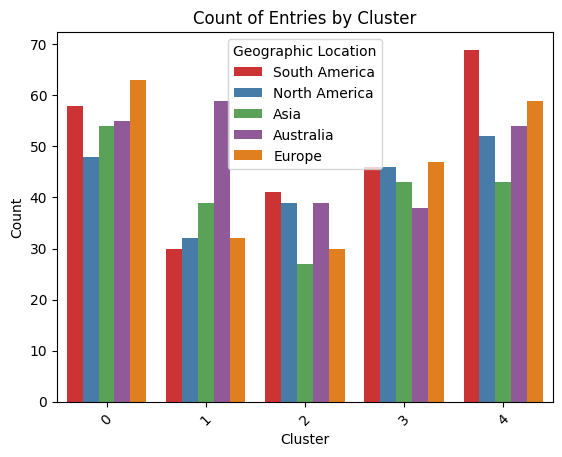

In [28]:
barplot_clusters(categorical_features)

##Churn

In [29]:
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [30]:
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [31]:
X = df_transactions.merge(data, on = 'CustomerID')
X.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4


In [34]:
X["TransactionDate"] = pd.to_datetime(X["TransactionDate"])

X.sort_values(by=['CustomerID', 'TransactionDate'])
X.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4


In [35]:
customer_invoices = X.groupby(['Cluster', 'CustomerID', 'TransactionDate'])['TransactionAmount'].sum().reset_index()
customer_invoices.head()

,Cluster,CustomerID,TransactionDate,TransactionAmount
0,0,4,2021-02-28,350.545374
1,0,4,2021-06-28,42.259824
2,0,4,2021-07-28,22.300978
3,0,4,2021-11-28,322.891563
4,0,4,2023-01-28,357.028148


In [38]:
sum(customer_invoices["TransactionAmount"] < 0)

0

In [40]:
customer_invoices_clean = customer_invoices[customer_invoices['TransactionAmount'] > 0].copy().dropna()

snapshot_date = customer_invoices_clean['TransactionDate'].max()
snapshot_date

Timestamp('2024-08-31 00:00:00')

In [43]:
customer_invoices_clean['DaysBetweenPurchases'] = customer_invoices_clean.groupby(['Cluster', 'CustomerID'])['TransactionDate'].diff().dt.days

general_threshold = customer_invoices_clean['DaysBetweenPurchases'].quantile(0.90)
general_threshold

426.0

In [44]:
threshold_per_cluster = customer_invoices_clean.groupby('Cluster')['DaysBetweenPurchases'].agg(
    percentile_90=lambda x: x.quantile(0.90),
    transaction_count='count'
).reset_index()

threshold_per_cluster.head()

,Cluster,percentile_90,transaction_count
0,0,438.2,627
1,1,427.0,473
2,2,377.2,527
3,3,413.4,555
4,4,456.0,681


In [45]:
threshold_per_cluster['threshold'] = threshold_per_cluster.apply(
    lambda row: general_threshold if row['transaction_count'] < 30 else row['percentile_90'],
    axis=1
)

threshold_per_cluster.head()

,Cluster,percentile_90,transaction_count,threshold
0,0,438.2,627,438.2
1,1,427.0,473,427.0
2,2,377.2,527,377.2
3,3,413.4,555,413.4
4,4,456.0,681,456.0


In [46]:
last_invoice_date_per_customer = customer_invoices_clean.groupby(['Cluster','CustomerID'])['TransactionDate'].max().reset_index().rename(columns={'TransactionDate': 'LastTransactionDate'})

last_invoice_date_per_customer.head()

,Cluster,CustomerID,LastTransactionDate
0,0,4,2023-01-28
1,0,6,2024-02-29
2,0,9,2024-07-30
3,0,10,2020-03-31
4,0,12,2024-01-30


In [47]:
customers = last_invoice_date_per_customer.merge(threshold_per_cluster, on='Cluster')
customers.head()

,Cluster,CustomerID,LastTransactionDate,percentile_90,transaction_count,threshold
0,0,4,2023-01-28,438.2,627,438.2
1,0,6,2024-02-29,438.2,627,438.2
2,0,9,2024-07-30,438.2,627,438.2
3,0,10,2020-03-31,438.2,627,438.2
4,0,12,2024-01-30,438.2,627,438.2


In [48]:
customers['inactivity_days'] = (snapshot_date - customers['LastTransactionDate']).dt.days
customers['churned'] = (customers['inactivity_days'] > customers['threshold']).astype('int')

customers.head()

,Cluster,CustomerID,LastTransactionDate,percentile_90,transaction_count,threshold,inactivity_days,churned
0,0,4,2023-01-28,438.2,627,438.2,581,1
1,0,6,2024-02-29,438.2,627,438.2,184,0
2,0,9,2024-07-30,438.2,627,438.2,32,0
3,0,10,2020-03-31,438.2,627,438.2,1614,1
4,0,12,2024-01-30,438.2,627,438.2,214,0


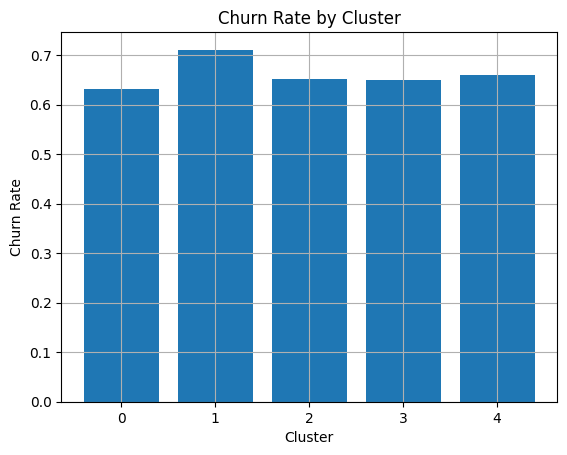

In [49]:
churned_x_cluster = customers.groupby('Cluster')['churned'].mean()
plt.figure()
plt.grid()
plt.bar(churned_x_cluster.index, churned_x_cluster.values)
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Cluster')
plt.show()